In [200]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Cscorer.utils.core import convert_df_to_gdf
path = "/home/manat/projects/CScorer/work/dev/data/data.duckdb"
target = 'expert_match'


In [201]:
def plot_cat_rate(df, cat_col, target = target):
    output = "/home/manat/projects/CScorer/work/dev/data/eda"
    rates = (
        df.groupby(cat_col)[target]
        .mean()
        .sort_values()
    )
    sns.barplot(x=rates.index[:20], y=rates.values[:20])
    plt.xticks(rotation=45, ha='right')   # or rotation=60, ha='right'
    plt.title(f"Observations rates for {cat_col}", fontsize=16)
    plt.savefig(f"{output}/{cat_col}_target_rates.jpg")



In [202]:
def reduce_categories(df, col, k=20):
    top = df[col].value_counts().nlargest(k).index
    df[col + "_top"] = df[col].where(df[col].isin(top), "Other")
    return df


In [203]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM preprocessed.citizen_matched""" ).df()
df = df.drop(columns= 'geom')
con.close()


<Axes: >

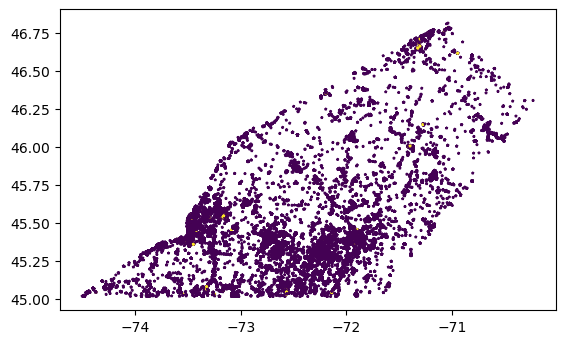

In [ ]:
gdf = convert_df_to_gdf(df)
#gdf.plot(marker = '*', column= target, markersize= 2)

In [205]:
#df = df[df['expert_match'] == 1 ]

In [206]:
df.shape

(65000, 28)

In [207]:
df.describe()

,gbifID,taxonKey,day,month,year,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,num_identification_agreements,num_identification_disagreements,description,expert_match
count,6.500000e+04,6.500000e+04,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
mean,4.366153e+09,4.076223e+06,15.762108,6.646554,2022.461615,45.487695,-72.561291,45.518062,1.306185,0.006062,0.141492,0.016415
std,9.992369e+08,1.829420e+06,8.921619,1.507837,2.650931,0.345596,0.779661,116.018470,0.599906,0.079190,0.348531,0.127068
min,8.910220e+08,2.650633e+06,1.000000,4.000000,2011.000000,45.014886,-74.503593,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.858534e+09,2.888353e+06,8.000000,5.000000,2021.000000,45.310863,-73.264769,3.000000,1.000000,0.000000,0.000000,0.000000
50%,4.607475e+09,3.114043e+06,16.000000,7.000000,2023.000000,45.418306,-72.629188,7.000000,1.000000,0.000000,0.000000,0.000000
75%,5.153946e+09,5.338762e+06,24.000000,8.000000,2025.000000,45.554355,-71.934302,22.000000,1.000000,0.000000,0.000000,0.000000
max,5.868425e+09,1.220746e+07,31.000000,9.000000,2025.000000,46.817932,-70.230866,999.000000,7.000000,2.000000,1.000000,1.000000


In [208]:
df.describe(include=[object], exclude= [float, int])

,occurrenceID,publishingOrgKey,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,eventDate,recordedBy,issue,url,image_url
count,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000
unique,64997,2,1,1,5,45,138,604,1489,1,1498,60293,3089,10,64997,64937
top,https://www.inaturalist.org/observations/53731259,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Acer,Onoclea sensibilis,SPECIES,Onoclea sensibilis L.,2014-08-10,Vincent Laurie,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/53731259,https://inaturalist-open-data.s3.amazonaws.com...
freq,2,64997,65000,65000,46004,7525,7203,2393,1060,65000,1060,16,4125,61312,2,4


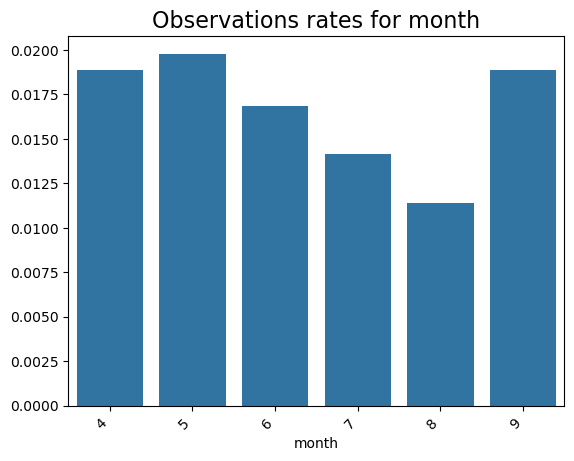

In [209]:
plot_cat_rate(df, 'month')

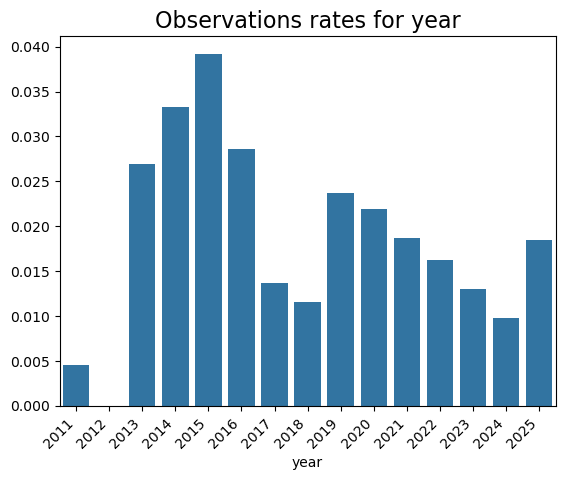

In [210]:
plot_cat_rate(df, 'year')

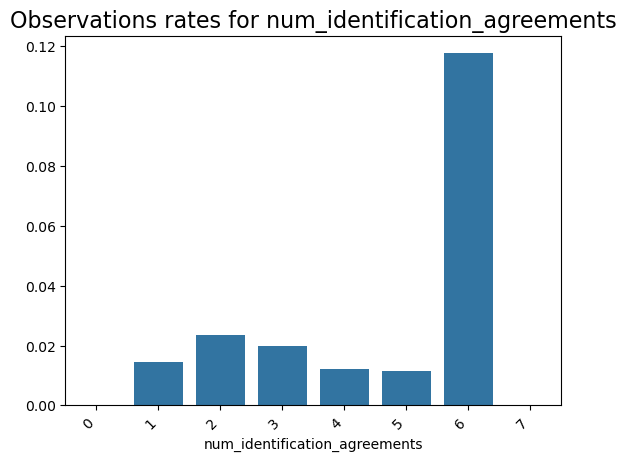

In [211]:
plot_cat_rate(df, "num_identification_agreements")

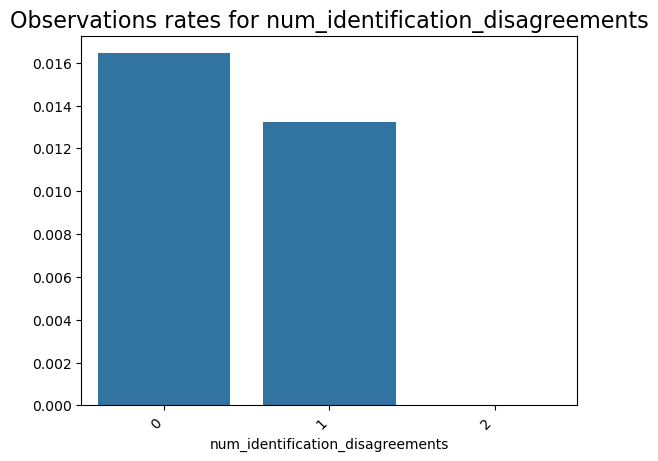

In [212]:
plot_cat_rate(df, "num_identification_disagreements")

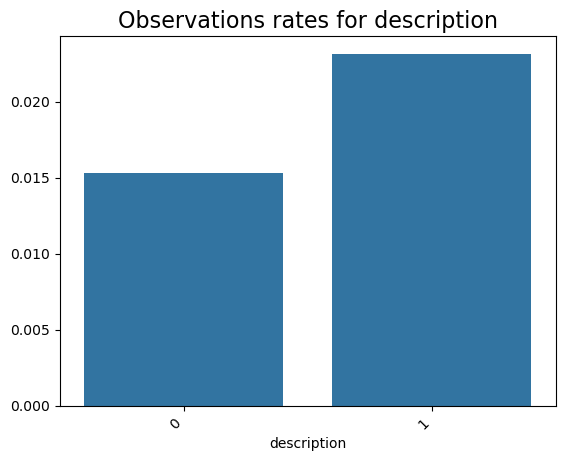

In [213]:
plot_cat_rate(df, "description")

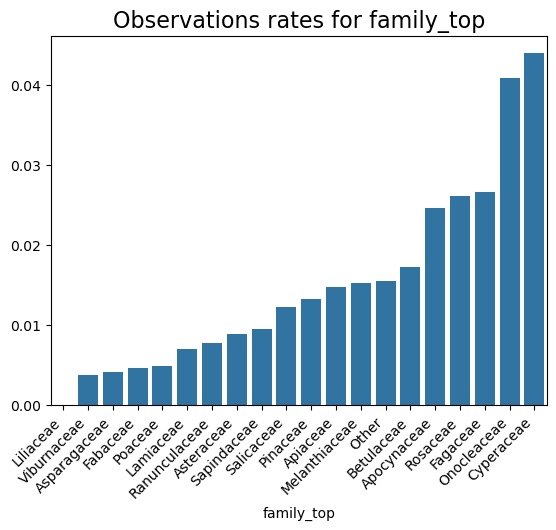

In [214]:
df = reduce_categories(df, 'family')
plot_cat_rate(df, "family_top")

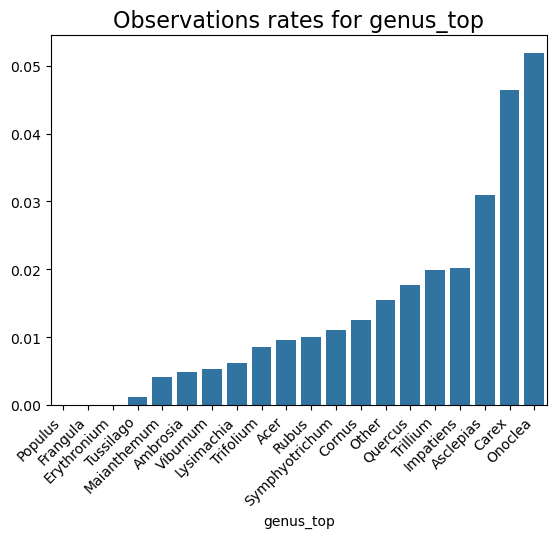

In [215]:
df = reduce_categories(df, 'genus')
plot_cat_rate(df, "genus_top")

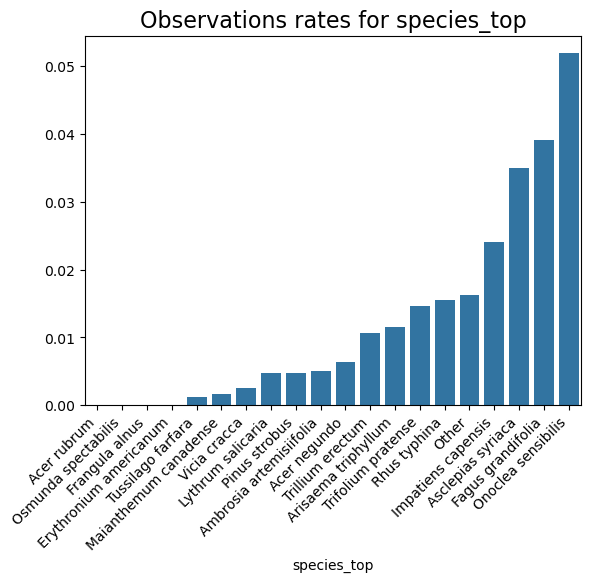

In [216]:
df = reduce_categories(df, 'species')
plot_cat_rate(df, "species_top")

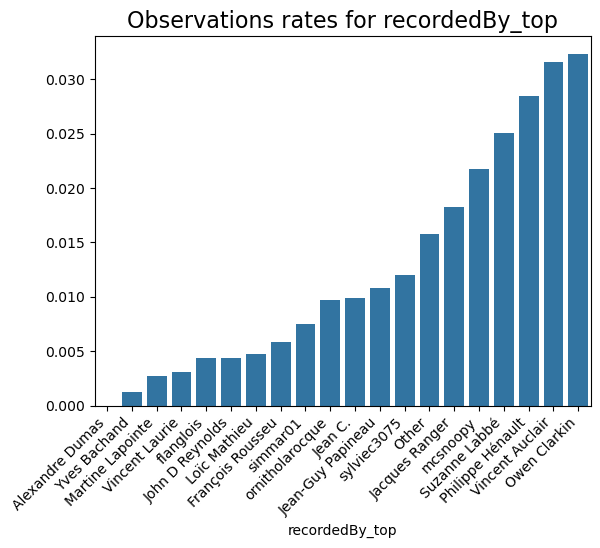

In [217]:
df = reduce_categories(df, 'recordedBy')
plot_cat_rate(df, "recordedBy_top")